Import Statements

In [203]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os


Importing Files

In [204]:
# Path Variables to keep stuff neat.
List_names = ["PHY3004W_gglab_BlueBack_single.csv","PHY3004W_gglab_BlueCo60_single.csv","PHY3004W_gglab_BlueCs137_single.csv","PHY3004W_gglab_BlueNa22_single.csv","PHY3004W_gglab_RedBack_single.csv","PHY3004W_gglab_RedCo60_single.csv","PHY3004W_gglab_RedCs137_single.csv","PHY3004W_gglab_RedNa22_single.csv"]
List = []
Row_col_List=[] #2D array number of (rows,columns)

for i in range(len(List_names)):
    List.append(pd.read_csv(str(List_names[i]))) #Lists of data
    Row_col = List[0].shape #2D array number of (rows,columns)
    Row_col_List.append(Row_col)
    print(Row_col)#row and column number
print("current working directory: is {}".format(os.getcwd()))
print(List[0].head(10))



(1029, 2)
(1029, 2)
(1029, 2)
(1029, 2)
(1029, 2)
(1029, 2)
(1029, 2)
(1029, 2)
current working directory: is C:\Users\Kryptic Nessi\Desktop\Data Files\UCT 2021\PHY3004W\Gamma-Gamma Coincidence\PHY3004W_gglab_singles_spectra
  Detector:    Blue (2)
0   Source:  Background
1   Gating:        None
2  Seconds:        1448
3       NaN         NaN
4   Channel      Counts
5         0           0
6         1           0
7         2           0
8         3           0
9         4           0


Quick Tutorial After importing csv files. How to use pandas!

In [205]:
# Some basic statistics abaout the data
List[0].describe()
List[0]['Detector:']# detector column viewing
First = List[0].iloc[5:1029,:] # Row selection
First.loc[10:15,:]['Detector:']  #selects rows 10 to 15 in detector column
First.astype(int) #Type cast

,Detector:,Blue (2)
5,0,0
6,1,0
7,2,0
8,3,0
9,4,0
...,...,...
1024,1019,0
1025,1020,0
1026,1021,1
1027,1022,0


Separating Each List into 2D lists of channel number, red count and blue count

In [206]:
# Truncated list
df = []
channel=[]
redcount =[]
bluecount = []
for i in range(len(List)):
    df.append(List[i].loc[5:1029,:].astype(int))
    df[i] = df[i].rename(columns={'Detector:':'Channel', 'Blue (2)':'Blue', 'Red (1)':'Red'}) #Renaming columns
    channel.append(List[i].loc[5:1029,:]['Detector:'].astype(int)) #2D list of channel numbers
    if 'Blue (2)' in List[i].columns:
        bluecount.append(List[i].loc[5:1029,:]['Blue (2)'])
    elif 'Red (1)' in List[i].columns:
        redcount.append(List[i].loc[5:1029,:]['Red (1)'])

    
    

Renaming column names. PS I just dont like them. meh!

Also! Here are the plots from two detectors superimposed 

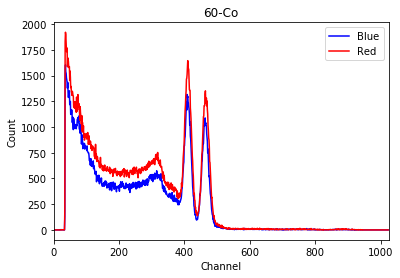

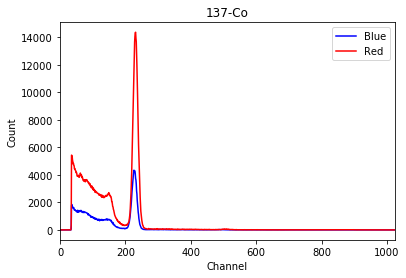

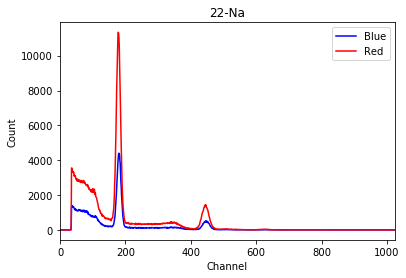

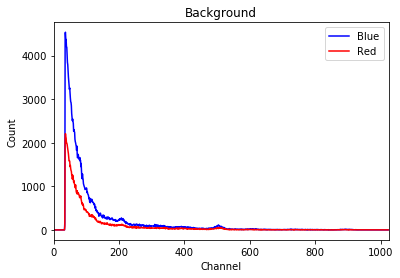

In [207]:
#Plotting the data frame (df is a list of truncated dataframes)
ax = df[1].plot( x='Channel',y='Blue', xlim=[0,1024], color='b', ylabel='Count', title='60-Co' )
df[5].plot( x='Channel',y='Red', xlim=[0,1024], ax=ax, color='r')

ax1 = df[2].plot( x='Channel',y='Blue', xlim=[0,1024], color='b', ylabel='Count', title='137-Co' )
df[6].plot( x='Channel',y='Red', xlim=[0,1024], ax=ax1, color='r' )

ax1 = df[3].plot( x='Channel',y='Blue', xlim=[0,1024], color='b', ylabel='Count', title='22-Na' )
df[7].plot( x='Channel',y='Red', xlim=[0,1024], ax=ax1, color='r')

ax1 = df[0].plot( x='Channel',y='Blue', xlim=[0,1024], color='b', ylabel='Count', title='Background') 
df[4].plot( x='Channel',y='Red', xlim=[0,1024], ax=ax1, color='r')
